In [1]:
import networkx as nx
import matplotlib.pyplot as plt
def generate_directed_with_vertices_order(G, root=None):
    directed_graph = nx.DiGraph()
    nodes_order = []
    for source, destination, edge_label in nx.dfs_labeled_edges(G, source=root):
        if(edge_label == "forward"):
            if(source == destination):
                directed_graph.add_node(destination, parent=None)
                nodes_order.append(destination)
            else:
                directed_graph.add_node(destination, parent=source)
                directed_graph.add_edge(destination, source, nontree=False)
                nodes_order.append(destination)
        elif((edge_label == "nontree") and (destination not in directed_graph[source])):
            directed_graph.add_edge(destination, source, nontree=True)
    return directed_graph, nodes_order
def generate_chain(G, source, destination, visited):
    chain_edges = []
    first_node = source
    while destination not in visited:
        chain_edges.append((source, destination))
        visited.add(destination)
        source = destination
        destination = G.nodes[destination]['parent']
    chain_edges.append((source, destination))
    last_node = destination
    cycle = first_node == last_node
    return chain_edges, cycle
def construct_chain_decomposition(G):
    directed_graph , nodes_order = generate_directed_with_vertices_order(G)
    chains = []
    cycles = []
    visited = set()
    for node in nodes_order:
        visited.add(node)
        backward_edges = [(source, destination) for source, destination, edge_label in directed_graph.out_edges(node, data="nontree") if edge_label]
        for edge in backward_edges:
            chain, cycle = list(generate_chain(directed_graph, edge[0], edge[1], visited))
            chains.append(chain)
            cycles.append(cycle)
    return chains, cycles
def check_connectivity(G):
    is_2_edge_connected = True
    is_2_vertex_connected = True
    chains_edges = []
    bridges = []
    cycles = []
    edges = G.edges()
    chains, cycles = construct_chain_decomposition(G)
    for chain in chains:
        for edge in chain:
            chains_edges.append(edge)
    for edge in edges:
        if(((edge[0], edge[1]) not in chains_edges) and ((edge[1], edge[0]) not in chains_edges)):
            bridges.append((edge[0], edge[1]))
    if(len(bridges) != 0):
        is_2_edge_connected = False
        is_2_vertex_connected = False
    elif(len(cycles) > 1):
        is_2_vertex_connected = False
    cuts = []
    for edge in bridges:
        if(G.degree(edge[0]) >= 2):
            cuts.append(edge[0])
        if(G.degree(edge[1]) >= 2):
            cuts.append(edge[1])
    for (index, chain, cycle) in zip(range(len(cycles)), chains, cycles):
        cut_candidate = chain[0][0]
        if((cycle) and (index > 0) and (G.degree(cut_candidate) >= 2)):
            cuts.append(cut_candidate)
    result = {
        "2 edge connected": is_2_edge_connected,
        "2 vertex connected": is_2_vertex_connected,
        "bridges": set(bridges),
        "cuts": set(cuts),
        "chains": chains
    }
    return result

C:\Users\Ayman\Anaconda3\lib\site-packages\networkx\drawing\layout.py:923: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))
C:\Users\Ayman\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


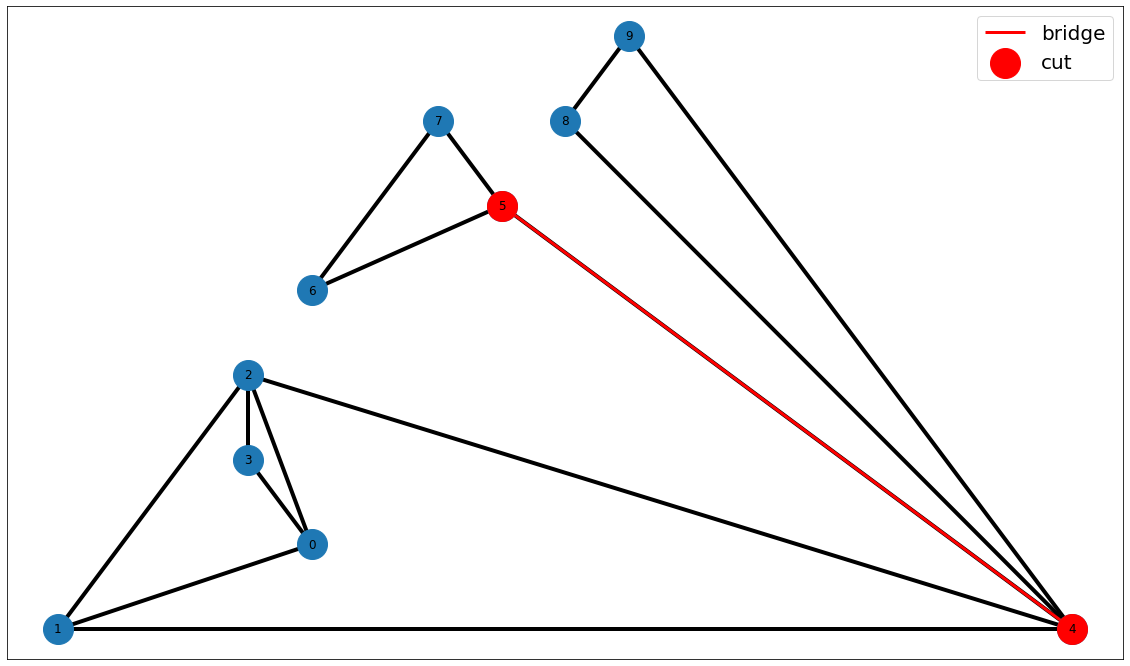

{'2 edge connected': False, '2 vertex connected': False, 'bridges': {(4, 5)}, 'cuts': {4, 5}, 'chains': [[(0, 2), (2, 4), (4, 1), (1, 0)], [(0, 3), (3, 2)], [(1, 2)], [(4, 9), (9, 8), (8, 4)], [(5, 7), (7, 6), (6, 5)]]}


In [2]:
graph = nx.Graph()
graph.add_edge(0,1)
graph.add_edge(0,2)
graph.add_edge(0,3)
graph.add_edge(1,4)
graph.add_edge(1,2)
graph.add_edge(2,3)
graph.add_edge(2,4)
graph.add_edge(4,5)
graph.add_edge(4,8)
graph.add_edge(4,9)
graph.add_edge(5,6)
graph.add_edge(5,7)
graph.add_edge(6,7)
graph.add_edge(8,9)
sol = check_connectivity(graph)
plt.figure(figsize=(20,12))
pos = None
try:
    pos = nx.planar_layout(graph)
except:
    pos = nx.spring_layout(graph)
nx.draw_networkx_nodes(graph,pos, node_size=900)
nx.draw_networkx_edges(graph,pos, width=4)
nx.draw_networkx_labels(graph,pos)
#nx.draw_networkx_edge_labels(graph,pos)
nx.draw_networkx_edges(graph, pos, edgelist=sol['bridges'], width=3.0, edge_color='r', style="solid", label="bridge")
nx.draw_networkx_nodes(graph, pos, nodelist=sol['cuts'], width=9.0, node_color='r', label="cut", node_size=900)
plt.legend(fontsize=20)
plt.show()
print(sol)

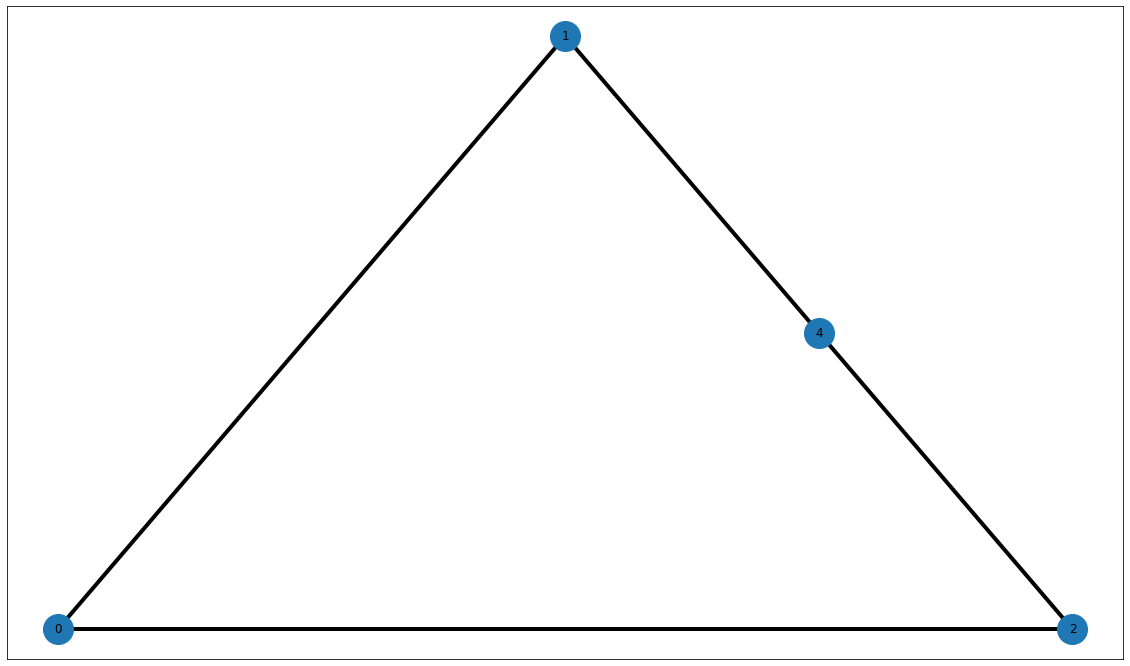

{'2 edge connected': True, '2 vertex connected': True, 'bridges': set(), 'cuts': set(), 'chains': [[(0, 1), (1, 4), (4, 2), (2, 0)]]}


In [3]:
graph = nx.Graph()
graph.add_edges_from([(0, 2), (2, 4), (4, 1), (1, 0)])
sol = check_connectivity(graph)
plt.figure(figsize=(20,12))
pos = None
try:
    pos = nx.planar_layout(graph)
except:
    pos = nx.spring_layout(graph)
nx.draw_networkx_nodes(graph,pos, node_size=900)
nx.draw_networkx_edges(graph,pos, width=4)
nx.draw_networkx_labels(graph,pos)
#nx.draw_networkx_edge_labels(graph,pos)
nx.draw_networkx_edges(graph, pos, edgelist=sol['bridges'], width=3.0, edge_color='r', style="solid", label="bridge")
nx.draw_networkx_nodes(graph, pos, nodelist=sol['cuts'], width=9.0, node_color='r', label="cut", node_size=900)
if(not((len(sol['cuts']) == 0 and len(sol['bridges']) ==0))):
    plt.legend(fontsize=20)
plt.show()
print(sol)

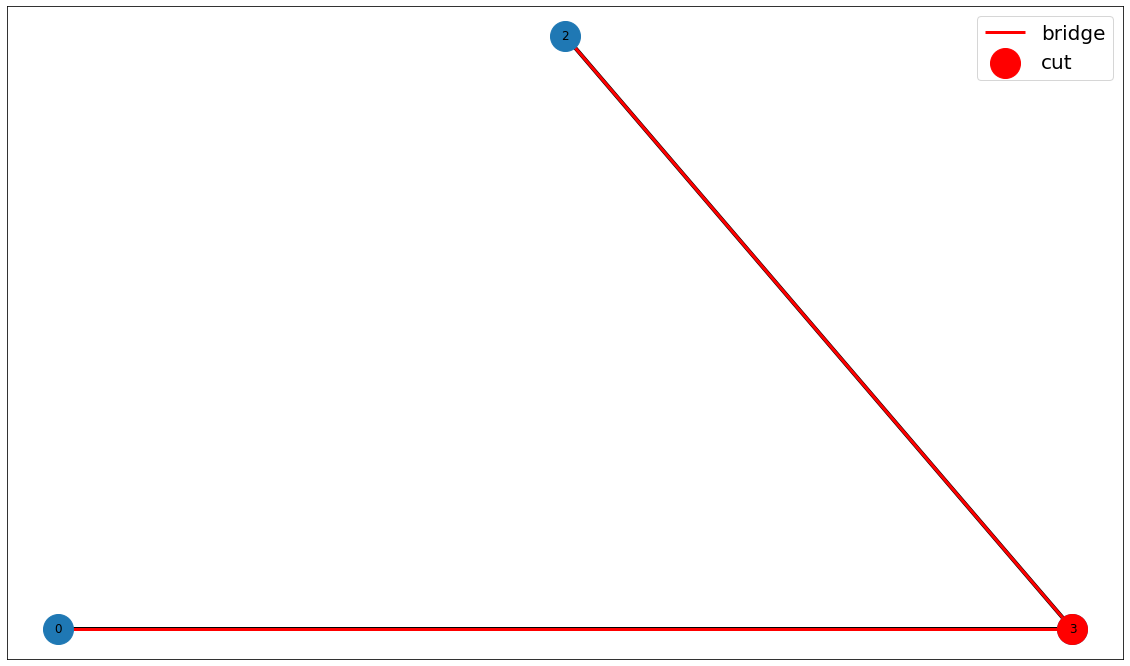

{'2 edge connected': False, '2 vertex connected': False, 'bridges': {(0, 3), (3, 2)}, 'cuts': {3}, 'chains': []}


In [4]:
graph = nx.Graph()
graph.add_edges_from([(0, 3), (3, 2)])
sol = check_connectivity(graph)
plt.figure(figsize=(20,12))
pos = None
try:
    pos = nx.planar_layout(graph)
except:
    pos = nx.spring_layout(graph)
nx.draw_networkx_nodes(graph,pos, node_size=900)
nx.draw_networkx_edges(graph,pos, width=4)
nx.draw_networkx_labels(graph,pos)
#nx.draw_networkx_edge_labels(graph,pos)
nx.draw_networkx_edges(graph, pos, edgelist=sol['bridges'], width=3.0, edge_color='r', style="solid", label="bridge")
nx.draw_networkx_nodes(graph, pos, nodelist=sol['cuts'], width=9.0, node_color='r', label="cut", node_size=900)
if(not((len(sol['cuts']) == 0 and len(sol['bridges']) ==0))):
    plt.legend(fontsize=20)
plt.show()
print(sol)

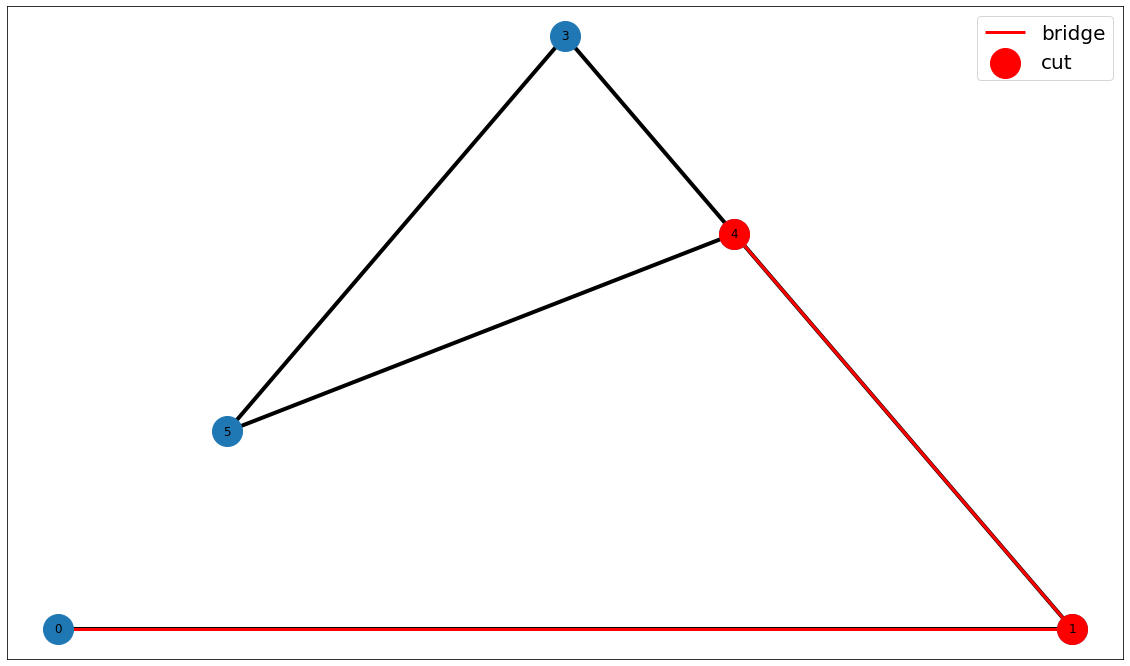

{'2 edge connected': False, '2 vertex connected': False, 'bridges': {(0, 1), (1, 4)}, 'cuts': {1, 4}, 'chains': [[(4, 3), (3, 5), (5, 4)]]}


In [5]:
graph = nx.Graph()
graph.add_edge(0,1)
graph.add_edge(1,4)
graph.add_edge(4,5)
graph.add_edge(4,3)
graph.add_edge(5,3)
sol = check_connectivity(graph)
plt.figure(figsize=(20,12))
pos = None
try:
    pos = nx.planar_layout(graph)
except:
    pos = nx.spring_layout(graph)
nx.draw_networkx_nodes(graph,pos, node_size=900)
nx.draw_networkx_edges(graph,pos, width=4)
nx.draw_networkx_labels(graph,pos)
#nx.draw_networkx_edge_labels(graph,pos)
nx.draw_networkx_edges(graph, pos, edgelist=sol['bridges'], width=3.0, edge_color='r', style="solid", label="bridge")
nx.draw_networkx_nodes(graph, pos, nodelist=sol['cuts'], width=9.0, node_color='r', label="cut", node_size=900)
if(not((len(sol['cuts']) == 0 and len(sol['bridges']) ==0))):
    plt.legend(fontsize=20)
plt.show()
print(sol)

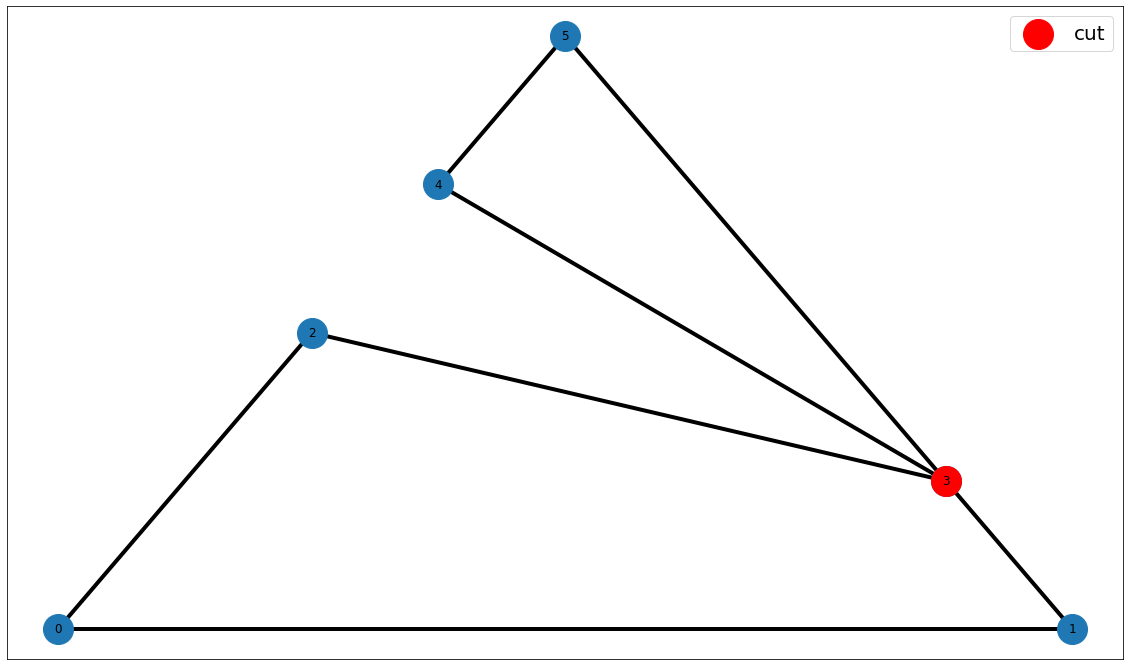

{'2 edge connected': True, '2 vertex connected': False, 'bridges': set(), 'cuts': {3}, 'chains': [[(0, 2), (2, 3), (3, 1), (1, 0)], [(3, 5), (5, 4), (4, 3)]]}


In [6]:
graph = nx.Graph()
graph.add_edge(0,1)
graph.add_edge(0,2)
graph.add_edge(1,3)
graph.add_edge(2,3)
graph.add_edge(3,4)
graph.add_edge(3,5)
graph.add_edge(4,5)
sol = check_connectivity(graph)
plt.figure(figsize=(20,12))
pos = None
try:
    pos = nx.planar_layout(graph)
except:
    pos = nx.spring_layout(graph)
nx.draw_networkx_nodes(graph,pos, node_size=900)
nx.draw_networkx_edges(graph,pos, width=4)
nx.draw_networkx_labels(graph,pos)
#nx.draw_networkx_edge_labels(graph,pos)
nx.draw_networkx_edges(graph, pos, edgelist=sol['bridges'], width=3.0, edge_color='r', style="solid", label="bridge")
nx.draw_networkx_nodes(graph, pos, nodelist=sol['cuts'], width=9.0, node_color='r', label="cut", node_size=900)
if(not((len(sol['cuts']) == 0 and len(sol['bridges']) ==0))):
    plt.legend(fontsize=20)
plt.show()
print(sol)

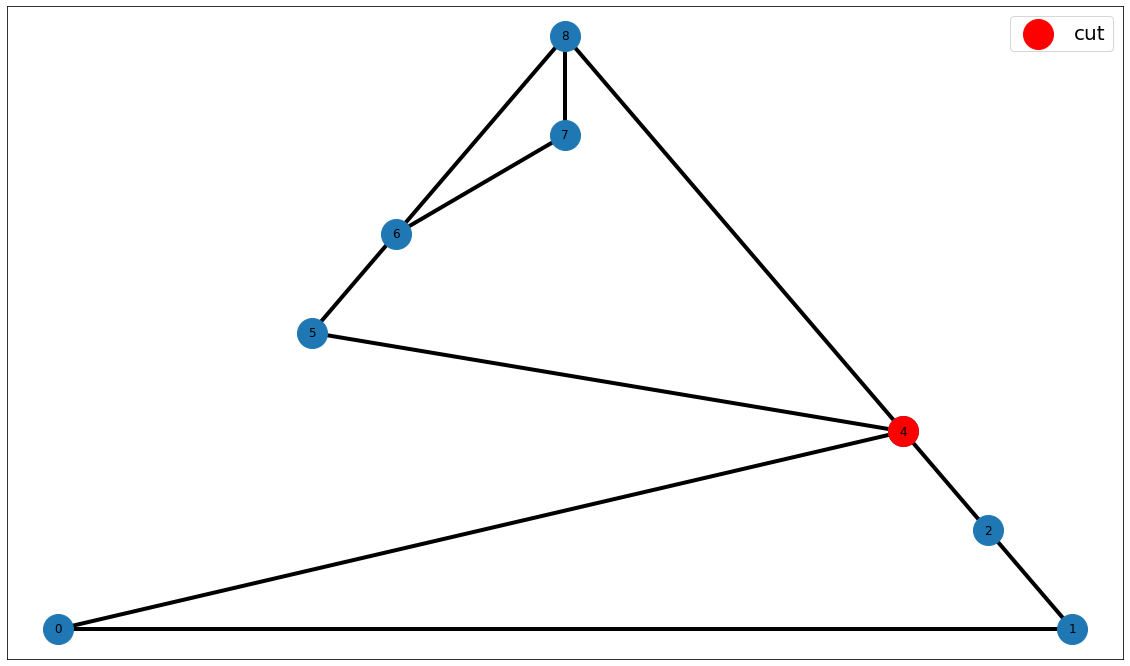

{'2 edge connected': True, '2 vertex connected': False, 'bridges': set(), 'cuts': {4}, 'chains': [[(0, 4), (4, 2), (2, 1), (1, 0)], [(4, 8), (8, 7), (7, 6), (6, 5), (5, 4)], [(6, 8)]]}


In [7]:
graph = nx.Graph()
graph.add_edges_from([(0,1),(0,4),(1,2),(2,4),(4,5),(4,8),(5,6),(6,7),(7,8),(6,8)])
sol = check_connectivity(graph)
plt.figure(figsize=(20,12))
pos = None
try:
    pos = nx.planar_layout(graph)
except:
    pos = nx.spring_layout(graph)
nx.draw_networkx_nodes(graph,pos, node_size=900)
nx.draw_networkx_edges(graph,pos, width=4)
nx.draw_networkx_labels(graph,pos)
#nx.draw_networkx_edge_labels(graph,pos)
nx.draw_networkx_edges(graph, pos, edgelist=sol['bridges'], width=3.0, edge_color='r', style="solid", label="bridge")
nx.draw_networkx_nodes(graph, pos, nodelist=sol['cuts'], width=9.0, node_color='r', label="cut", node_size=900)
if(not((len(sol['cuts']) == 0 and len(sol['bridges']) ==0))):
    plt.legend(fontsize=20)
plt.show()
print(sol)